# Resolución de preguntas de tablas de indexmundi
### *Andrea Rodriguez Yáñez*
### *Carlos Roberto Valdivia Garcia*
### *Andrea Paloma Cimental Chávez*
### *José de Jesús Muñoz Valdivia*
## Tablas a utilizar:
* Taza de muerte
* Densidad de camas de hospital
* obesidad - taza de prevalencia en adultos


## Preguntas para responder:
* ¿Cuáles son los países con mayor taza de muerte? 
* ¿Cuáles son los países con mayor obesidad?
* ¿Cuáles son los países con mayor saturación de camas?
* ¿Cuál es el promedio de obesidad correspondiente a cada valor de taza de muertes?
* ¿Cuál es el promedio de saturación de camas correspondiente a cada valor de taza de muertes?
* ¿Cuál es el porcentaje de países cuya obesidad es mayor a 30%?
* ¿Cuál es el porcentaje de países cuya saturación de camas es menor a 5%?
* ¿Cuál es la moda de taza de muertes de países en Asia/Europa/America? (separado por continentes)
* ¿Cuál es la moda de obesidad de países en Asia/Europa/America? (separado por continentes)
* ¿Qué países tienen una taza de muerte mayor a 10 y un porcentaje de obesidad mayor a 30%?
* ¿Cuáles son los países con mayor taza de muerte y una taza de obesidad menor al 35%?
* ¿Cuáles son los países con mayor saturación de camas y un porcentaje de obesidad mayor al 35%?

### Librerías iniciales y obtención de talbla "Death rate":

In [1]:
#Respuesta a las preguntas hechas con estadística descriptiva
import os
import numpy as np
import pandas as pd
#El modulo "requests" permite enviar solicitudes(delete, get, head) a un url especifico
import requests
import scipy

#Leemos los datos de la tabla Death Rate
html = requests.get('https://www.indexmundi.com/map/?t=0&v=26&r=xx&l=en').content
df_DR = pd.read_html('https://www.indexmundi.com/map/?t=0&v=26&r=xx&l=en')

In [2]:
datos_DR = df_DR[1]
datos_DR.to_csv('DeathRate.csv')
datos_DR

,Country,"Death rate (deaths/1,000 population)",Year
0,Lesotho,15,2018
1,Lithuania,15,2018
2,Latvia,15,2018
3,Bulgaria,15,2018
4,Ukraine,14,2018
...,...,...,...
192,Saudi Arabia,3,2018
193,Bahrain,3,2018
194,Kuwait,2,2018
195,United Arab Emirates,2,2018


### Obtención de tabla "Hospital bed density":

In [3]:
#Leemos los datos de la tabla Hospital bed density
html = requests.get('https://www.indexmundi.com/map/?t=0&v=2227&r=xx&l=en').content
df_HB = pd.read_html('https://www.indexmundi.com/map/?t=0&v=2227&r=xx&l=en')
datos_HB = df_HB[1]
datos_HB.to_csv('HospitalBeds.csv')
datos_HB

,Country,"Hospital bed density (beds/1,000 population)",Year
0,Monaco,14,2012
1,Japan,13,2012
2,"Korea, North",13,2012
3,"Korea, South",12,2015
4,Belarus,11,2013
...,...,...,...
167,Guinea,0,2011
168,Ethiopia,0,2015
169,Iran,0,2014
170,Madagascar,0,2010


### Obtención de Tabla "Obesity":

In [4]:
#Leemos los datos de la tabla Obesity
html = requests.get('https://www.indexmundi.com/map/?t=0&v=2228&r=xx&l=en').content
df_Ob = pd.read_html('https://www.indexmundi.com/map/?t=0&v=2228&r=xx&l=en')
datos_Ob = df_Ob[1]
datos_Ob.to_csv('Obesity.csv')
datos_Ob

,Country,Obesity - adult prevalence rate (%),Year
0,Nauru,61,2016
1,Palau,55,2016
2,Tuvalu,52,2016
3,Tonga,48,2016
4,Samoa,47,2016
...,...,...,...
180,India,4,2016
181,Cambodia,4,2016
182,East Timor,4,2016
183,Bangladesh,4,2016


### 1. Los 50 países con mayor tasa de mortalidad

In [5]:
import matplotlib.pyplot as plt
First50_DR = datos_DR.head(50)
First50_DR

,Country,"Death rate (deaths/1,000 population)",Year
0,Lesotho,15,2018
1,Lithuania,15,2018
2,Latvia,15,2018
3,Bulgaria,15,2018
4,Ukraine,14,2018
5,Serbia,14,2018
6,Russia,13,2018
7,Belarus,13,2018
8,Afghanistan,13,2018
9,Central African Republic,13,2018


In [6]:
First50_DR.columns

Index(['Country', 'Death rate (deaths/1,000 population)', 'Year'], dtype='object')

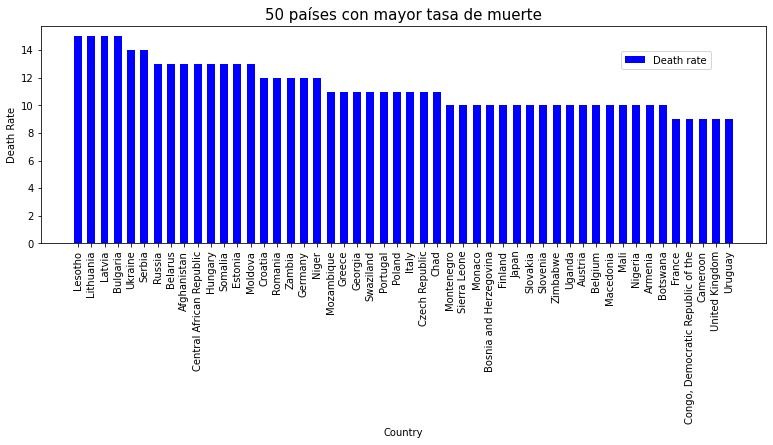

In [7]:
#Grafiquemos la tabla anterior
#Plot_DR = First50_DR.plot(x='Country', y='Death rate (deaths/1,000 population)', kind='bar', legend=True)  
#Plot_DR.set_xlabel("50 paises con mayor tasa de muerte")
#Plot_DR.set_ylabel("Death rate")

%matplotlib inline

plt.figure(figsize=[13,4])
plt.bar(First50_DR['Country'], First50_DR['Death rate (deaths/1,000 population)'], width=0.6, color='blue', label='Death rate')
plt.xlabel('Country')
plt.ylabel('Death Rate')
#plt.plot([0,46], [Mode_As_Ob,Mode_As_Ob], linestyle='dotted', linewidth=2.5, color = 'blue', label="Moda")
plt.title("50 países con mayor tasa de muerte", fontsize=15)
plt.xticks(fontsize=10, rotation='vertical')
plt.legend(bbox_to_anchor=(0.8,0.8), loc='lower left', borderaxespad=0.0)
plt.show()

### Los 50 países con menor tasa de mortalidad

In [8]:
#Los 50 países con menor tasa de mortalidad
Last50_DR = datos_DR.tail(50)
Last50_DR

,Country,"Death rate (deaths/1,000 population)",Year
147,Turkey,6,2018
148,Cape Verde,6,2018
149,Cayman Islands,6,2018
150,Nauru,6,2018
151,Vietnam,6,2018
152,Yemen,6,2018
153,Tajikistan,6,2018
154,East Timor,6,2018
155,El Salvador,6,2018
156,Antigua and Barbuda,6,2018


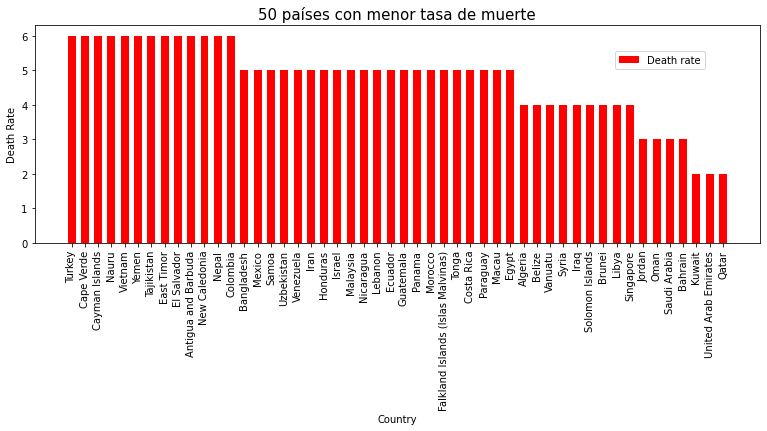

In [9]:

#Grafiquemos la tabla anterior
#Plot_DR2 = Last50_DR.plot(x='Country', y='Death rate (deaths/1,000 population)', kind='bar', legend=True)  
#Plot_DR2.set_xlabel("50 paises con menor tasa de muerte")
#Plot_DR2.set_ylabel("Death rate")
%matplotlib inline

plt.figure(figsize=[13,4])
plt.bar(Last50_DR['Country'], Last50_DR['Death rate (deaths/1,000 population)'], width=0.6, color='red', label='Death rate')
plt.xlabel('Country')
plt.ylabel('Death Rate')
#plt.plot([0,46], [Mode_As_Ob,Mode_As_Ob], linestyle='dotted', linewidth=2.5, color = 'blue', label="Moda")
plt.title("50 países con menor tasa de muerte", fontsize=15)
plt.xticks(fontsize=10, rotation='vertical')
plt.legend(bbox_to_anchor=(0.8,0.8), loc='lower left', borderaxespad=0.0)
plt.show()

### 2. Los 20 países con mayor densidad de camas de hospital

In [10]:
#Los 20 países con mayor densidad de camas de hospital
First20_HB = datos_HB.head(20)
First20_HB

,Country,"Hospital bed density (beds/1,000 population)",Year
0,Monaco,14,2012
1,Japan,13,2012
2,"Korea, North",13,2012
3,"Korea, South",12,2015
4,Belarus,11,2013
5,Ukraine,9,2013
6,Somalia,9,2014
7,Germany,8,2013
8,Greenland,8,2015
9,Russia,8,2013


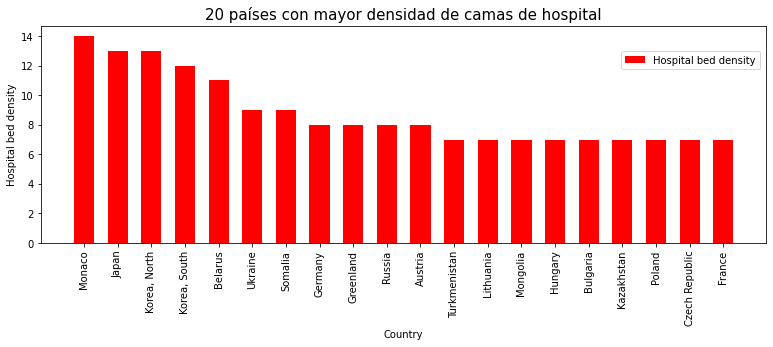

In [11]:
#Grafiquemos la tabla anterior
plt.figure(figsize=[13,4])
plt.bar(First20_HB['Country'], First20_HB['Hospital bed density (beds/1,000 population)'], width=0.6, color='red', label='Hospital bed density')
plt.xlabel('Country')
plt.ylabel('Hospital bed density')
#plt.plot([0,46], [Mode_As_Ob,Mode_As_Ob], linestyle='dotted', linewidth=2.5, color = 'blue', label="Moda")
plt.title("20 países con mayor densidad de camas de hospital", fontsize=15)
plt.xticks(fontsize=10, rotation='vertical')
plt.legend(bbox_to_anchor=(0.8,0.8), loc='lower left', borderaxespad=0.0)
plt.show()

In [12]:
First20_HB.columns

Index(['Country', 'Hospital bed density (beds/1,000 population)', 'Year'], dtype='object')

### Los 20 países con menor densidad de camas de hospital

In [13]:
#Los 50 países con menor densidad de camas de hospital
Last20_HB = datos_HB.tail(20)
Last20_HB

,Country,"Hospital bed density (beds/1,000 population)",Year
152,Venezuela,1,2014
153,Yemen,1,2014
154,Togo,1,2011
155,Tanzania,1,2010
156,India,1,2011
157,Mozambique,1,2011
158,Haiti,1,2013
159,Honduras,1,2014
160,Eritrea,1,2011
161,Guatemala,1,2014


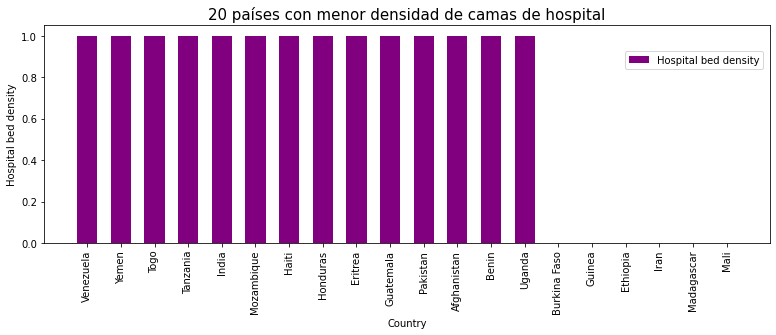

In [14]:

#Grafiquemos la tabla anterior
plt.figure(figsize=[13,4])
plt.bar(Last20_HB['Country'], Last20_HB['Hospital bed density (beds/1,000 population)'], width=0.6, color='purple', label='Hospital bed density')
plt.xlabel('Country')
plt.ylabel('Hospital bed density')
#plt.plot([0,46], [Mode_As_Ob,Mode_As_Ob], linestyle='dotted', linewidth=2.5, color = 'blue', label="Moda")
plt.title("20 países con menor densidad de camas de hospital", fontsize=15)
plt.xticks(fontsize=10, rotation='vertical')
plt.legend(bbox_to_anchor=(0.8,0.8), loc='lower left', borderaxespad=0.0)
plt.show()

### 3. Los 20 países con mayor indice de obesidad

In [15]:
#Los 20 países con mayor indice de obesidad
First20_Ob = datos_Ob.head(20)
First20_Ob

,Country,Obesity - adult prevalence rate (%),Year
0,Nauru,61,2016
1,Palau,55,2016
2,Tuvalu,52,2016
3,Tonga,48,2016
4,Samoa,47,2016
5,Kiribati,46,2016
6,Kuwait,38,2016
7,United States,36,2016
8,Jordan,36,2016
9,Saudi Arabia,35,2016


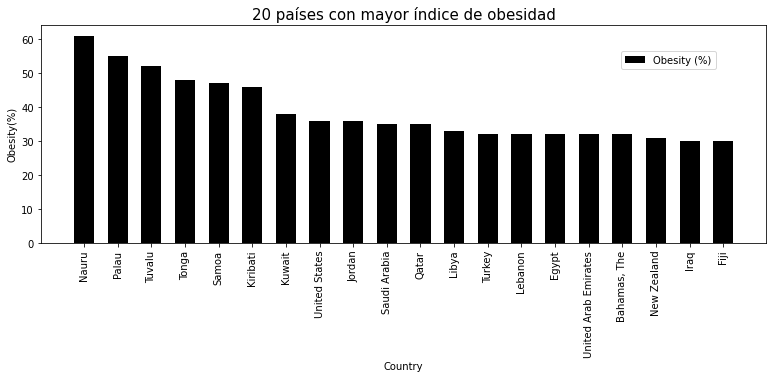

In [16]:
#Grafiquemos la tabla anterior
plt.figure(figsize=[13,4])
plt.bar(First20_Ob['Country'], First20_Ob['Obesity - adult prevalence rate (%)'], width=0.6, color='black', label= 'Obesity (%)')
plt.xlabel('Country')
plt.ylabel('Obesity(%)')
#plt.plot([0,46], [Mode_As_Ob,Mode_As_Ob], linestyle='dotted', linewidth=2.5, color = 'blue', label="Moda")
plt.title("20 países con mayor índice de obesidad", fontsize=15)
plt.xticks(fontsize=10, rotation='vertical')
plt.legend(bbox_to_anchor=(0.8,0.8), loc='lower left', borderaxespad=0.0)
plt.show()

In [17]:
datos_Ob.columns

Index(['Country', 'Obesity - adult prevalence rate (%)', 'Year'], dtype='object')

In [18]:
#Los 20 países con menor indice de obesidad
Last20_Ob = datos_Ob.tail(20)
Last20_Ob

,Country,Obesity - adult prevalence rate (%),Year
165,Rwanda,6,2016
166,Malawi,6,2016
167,Burkina Faso,6,2016
168,Niger,6,2016
169,Afghanistan,6,2016
170,Burundi,5,2016
171,Madagascar,5,2016
172,Laos,5,2016
173,Uganda,5,2016
174,Sri Lanka,5,2016


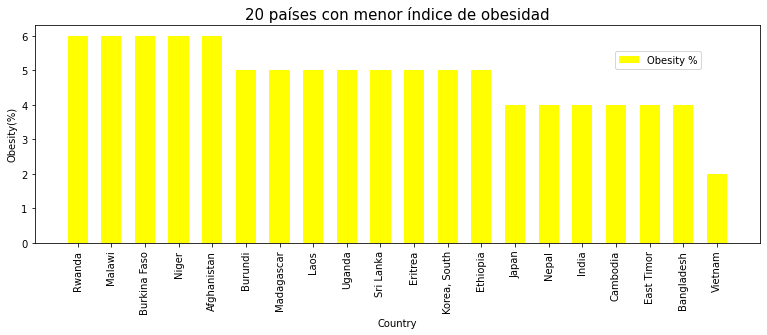

In [19]:

#Plot_Ob2 = Last20_Ob.plot(x='Country', y='Obesity - adult prevalence rate (%)', kind='bar', legend=True)  
#Plot_Ob2.set_xlabel("País")
#Plot_Ob2.set_ylabel("20 países con menor índice de obesidad")

#Grafiquemos la tabla anterior
plt.figure(figsize=[13,4])
plt.bar(Last20_Ob['Country'], Last20_Ob['Obesity - adult prevalence rate (%)'], width=0.6, color='yellow', label='Obesity %')
plt.xlabel('Country')
plt.ylabel('Obesity(%)')
#plt.plot([0,46], [Mode_As_Ob,Mode_As_Ob], linestyle='dotted', linewidth=2.5, color = 'blue', label="Moda")
plt.title("20 países con menor índice de obesidad", fontsize=15)
plt.xticks(fontsize=10, rotation='vertical')
plt.legend(bbox_to_anchor=(0.8,0.8), loc='lower left', borderaxespad=0.0)

plt.show()

In [54]:
datos_HB

,Country,"Hospital bed density (beds/1,000 population)",Year
0,Monaco,14,2012
1,Japan,13,2012
2,"Korea, North",13,2012
3,"Korea, South",12,2015
4,Belarus,11,2013
...,...,...,...
167,Guinea,0,2011
168,Ethiopia,0,2015
169,Iran,0,2014
170,Madagascar,0,2010


### Promedio de la tasa de muerte en países con densidad de camas menor a 5 camas/1000 habitantes

In [55]:
#Seleccionamos aquellos países cuya densidad de camas de hospital menor a 5
datos_HB.loc[datos_HB['Hospital bed density (beds/1,000 population)'] < 5]

,Country,"Hospital bed density (beds/1,000 population)",Year
45,Macedonia,4,2013
46,Finland,4,2015
47,Greece,4,2015
48,China,4,2012
49,Armenia,4,2015
...,...,...,...
167,Guinea,0,2011
168,Ethiopia,0,2015
169,Iran,0,2014
170,Madagascar,0,2010


In [56]:
#HB_DR = pd.merge(datos_DR, datos_HB), 'inner' utiliza la intersección de ambos frames.
#Combined = datos_DR.merge(datos_HB, 'inner')
Combined = pd.merge(left=datos_DR, right=datos_HB, left_on='Country', right_on='Country') 
Combined

,Country,"Death rate (deaths/1,000 population)",Year_x,"Hospital bed density (beds/1,000 population)",Year_y
0,Lithuania,15,2018,7,2013
1,Latvia,15,2018,6,2013
2,Bulgaria,15,2018,7,2013
3,Ukraine,14,2018,9,2013
4,Serbia,14,2018,6,2012
...,...,...,...,...,...
167,Saudi Arabia,3,2018,3,2014
168,Bahrain,3,2018,2,2014
169,Kuwait,2,2018,2,2014
170,United Arab Emirates,2,2018,1,2013


In [57]:
Combined_average = Combined.loc[Combined['Hospital bed density (beds/1,000 population)']<5 ]
Combined_average

,Country,"Death rate (deaths/1,000 population)",Year_x,"Hospital bed density (beds/1,000 population)",Year_y
7,Afghanistan,13,2018,1,2014
8,Central African Republic,13,2018,1,2011
15,Zambia,12,2018,2,2010
17,Mozambique,11,2018,1,2011
18,Greece,11,2018,4,2015
...,...,...,...,...,...
167,Saudi Arabia,3,2018,3,2014
168,Bahrain,3,2018,2,2014
169,Kuwait,2,2018,2,2014
170,United Arab Emirates,2,2018,1,2013


In [58]:
#Promedio de tasa de muerte en países con densidad de camas menor a 5
#Promedio de Densidad de camas en países con densidad de camas menor a 5
Combined_average.mean()

Death rate (deaths/1,000 population)               7.000000
Year_x                                          2018.000000
Hospital bed density (beds/1,000 population)       2.070866
Year_y                                          2012.763780
dtype: float64

### ¿Cuál es el porcentaje de países cuya obesidad es mayor a 30%?

In [59]:
datos_Ob.columns

Index(['Country', 'Obesity - adult prevalence rate (%)', 'Year'], dtype='object')

In [60]:
Percentage = datos_Ob.loc[datos_Ob['Obesity - adult prevalence rate (%)']>30 ]
Percentage

,Country,Obesity - adult prevalence rate (%),Year
0,Nauru,61,2016
1,Palau,55,2016
2,Tuvalu,52,2016
3,Tonga,48,2016
4,Samoa,47,2016
5,Kiribati,46,2016
6,Kuwait,38,2016
7,United States,36,2016
8,Jordan,36,2016
9,Saudi Arabia,35,2016


In [61]:
len(Percentage)

18

In [62]:
len(datos_Ob)

185

In [63]:
#Porcentaje de países con indice de obesidad mayor a 30%
Per_Ob = len(Percentage)*100/len(datos_Ob)

In [64]:
print('El porcentaje de países con índice de obesidad mayor a 30% es: ',Per_Ob,'%' )

El porcentaje de países con índice de obesidad mayor a 30% es:  9.72972972972973 %


### ¿Cuál es el porcentaje de países cuya saturación de camas es menor a 5%?

In [65]:
datos_HB.columns

Index(['Country', 'Hospital bed density (beds/1,000 population)', 'Year'], dtype='object')

In [66]:
Percentage2 = datos_HB.loc[datos_HB['Hospital bed density (beds/1,000 population)']<5 ]

In [67]:
Percentage2

,Country,"Hospital bed density (beds/1,000 population)",Year
45,Macedonia,4,2013
46,Finland,4,2015
47,Greece,4,2015
48,China,4,2012
49,Armenia,4,2015
...,...,...,...
167,Guinea,0,2011
168,Ethiopia,0,2015
169,Iran,0,2014
170,Madagascar,0,2010


In [68]:
len(Percentage2)

127

In [69]:
len(datos_HB)

172

In [70]:
#Porcentaje de países con camas disponibles menor a 5%
Per_HB = len(Percentage2)*100/len(datos_HB)
print('El porcentaje de países con camas disponibles menor a 5% es: ',Per_HB,'%' )

El porcentaje de países con camas disponibles menor a 5% es:  73.83720930232558 %


### ¿Qué países tienen una taza de muerte mayor a 10 y un porcentaje de obesidad mayor a 10%?

In [71]:
Combined2 = pd.merge(left=datos_DR, right=datos_Ob, left_on='Country', right_on='Country') 
Combined2

,Country,"Death rate (deaths/1,000 population)",Year_x,Obesity - adult prevalence rate (%),Year_y
0,Lesotho,15,2018,17,2016
1,Lithuania,15,2018,26,2016
2,Latvia,15,2018,24,2016
3,Bulgaria,15,2018,25,2016
4,Ukraine,14,2018,24,2016
...,...,...,...,...,...
180,Saudi Arabia,3,2018,35,2016
181,Bahrain,3,2018,30,2016
182,Kuwait,2,2018,38,2016
183,United Arab Emirates,2,2018,32,2016


In [72]:
Combined2.columns

Index(['Country', 'Death rate (deaths/1,000 population)', 'Year_x',
       'Obesity - adult prevalence rate (%)', 'Year_y'],
      dtype='object')

In [73]:
#Países que tienen una taza de muerte mayor a 10 y un porcentaje de obesidad mayor a 10%?
Combined2[(Combined2['Death rate (deaths/1,000 population)'] > 10) & (Combined2['Obesity - adult prevalence rate (%)']>10)]


,Country,"Death rate (deaths/1,000 population)",Year_x,Obesity - adult prevalence rate (%),Year_y
0,Lesotho,15,2018,17,2016
1,Lithuania,15,2018,26,2016
2,Latvia,15,2018,24,2016
3,Bulgaria,15,2018,25,2016
4,Ukraine,14,2018,24,2016
5,Serbia,14,2018,22,2016
6,Russia,13,2018,23,2016
7,Belarus,13,2018,25,2016
10,Hungary,13,2018,26,2016
12,Estonia,13,2018,21,2016


### ¿Cuál es el promedio de obesidad correspondiente a cada valor de taza de muerte?

In [74]:
Combined2

,Country,"Death rate (deaths/1,000 population)",Year_x,Obesity - adult prevalence rate (%),Year_y
0,Lesotho,15,2018,17,2016
1,Lithuania,15,2018,26,2016
2,Latvia,15,2018,24,2016
3,Bulgaria,15,2018,25,2016
4,Ukraine,14,2018,24,2016
...,...,...,...,...,...
180,Saudi Arabia,3,2018,35,2016
181,Bahrain,3,2018,30,2016
182,Kuwait,2,2018,38,2016
183,United Arab Emirates,2,2018,32,2016


### ¿Cuál es la moda de tasa de muertes de países en Asia

In [75]:
#importamos la tabla correspondiente a tasa de muerte en Asia
html = requests.get('https://www.indexmundi.com/map/?t=0&v=26&r=as&l=en').content
Asia_DR = pd.read_html('https://www.indexmundi.com/map/?t=0&v=26&r=as&l=en')
Asia_DR = Asia_DR[1]
Asia_DR.to_csv('DeathRate_Asia.csv')
Asia_DR

,Country,"Death rate (deaths/1,000 population)",Year
0,Russia,13,2018
1,Russia,13,2018
2,Afghanistan,13,2018
3,Georgia,11,2018
4,Japan,10,2018
5,Armenia,10,2018
6,"Korea, North",9,2018
7,Kazakhstan,8,2018
8,Thailand,8,2018
9,China,8,2018


In [76]:
Asia_DR.columns

Index(['Country', 'Death rate (deaths/1,000 population)', 'Year'], dtype='object')

In [77]:
#Ahora veamos la moda de tasa de muerte en Asia
Mode_Asia = Asia_DR['Death rate (deaths/1,000 population)'].mode()

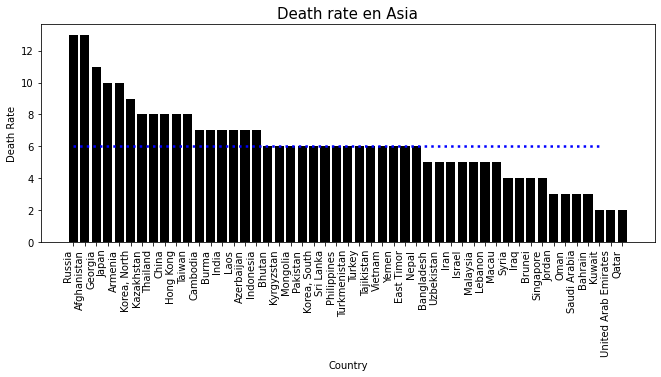

In [110]:
%matplotlib inline

plt.figure(figsize=[11,4])
plt.bar(Asia_DR['Country'], Asia_DR['Death rate (deaths/1,000 population)'], width=0.8, color='black', label='DeathRate')
plt.xlabel('Country')
plt.ylabel('Death Rate')
plt.plot([0,46], [Mode_Asia,Mode_Asia], linestyle='dotted', linewidth=2.5, color = 'blue', label="Moda")
plt.title("Death rate en Asia", fontsize=15)
plt.setp(plt.gca().get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

In [78]:
print('La moda de tasa de muerte en países de Asia es: ', Mode_Asia)

La moda de tasa de muerte en países de Asia es:  0    6
dtype: int64


### ¿Cuál es la moda de tasa de muertes de países en Europa?

In [79]:
#importamos la tabla correspondiente a tasa de muerte en Asia
html = requests.get('https://www.indexmundi.com/map/?t=0&v=26&r=eu&l=en').content
Europe_DR = pd.read_html('https://www.indexmundi.com/map/?t=0&v=26&r=eu&l=en')
Europe_DR = Europe_DR[1]
Europe_DR.to_csv('DeathRate_Europe.csv')
Europe_DR

,Country,"Death rate (deaths/1,000 population)",Year
0,Lithuania,15,2018
1,Bulgaria,15,2018
2,Latvia,15,2018
3,Ukraine,14,2018
4,Serbia,14,2018
5,Belarus,13,2018
6,Hungary,13,2018
7,Estonia,13,2018
8,Moldova,13,2018
9,Croatia,12,2018


In [80]:
Mode_Europe = Europe_DR['Death rate (deaths/1,000 population)'].mode()
print('La moda de tasa de muerte en países de Europe es: ', Mode_Europe)

La moda de tasa de muerte en países de Europe es:  0    10
dtype: int64


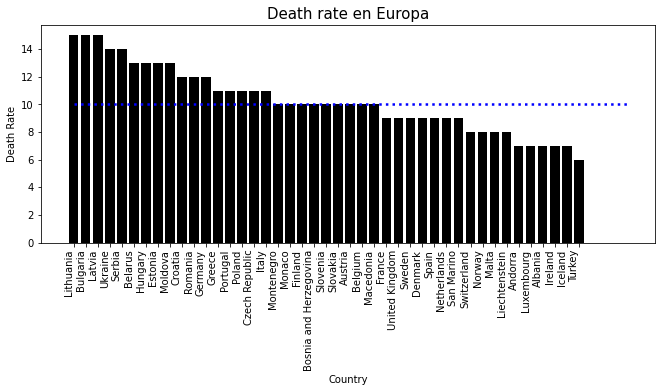

In [111]:
%matplotlib inline

plt.figure(figsize=[11,4])
plt.bar(Europe_DR['Country'], Europe_DR['Death rate (deaths/1,000 population)'], width=0.8, color='black', label='DeathRate')
plt.xlabel('Country')
plt.ylabel('Death Rate')
plt.plot([0,46], [Mode_Europe,Mode_Europe], linestyle='dotted', linewidth=2.5, color = 'blue', label="Moda")
plt.title("Death rate en Europa", fontsize=15)
plt.setp(plt.gca().get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

In [81]:
#importamos la tabla correspondiente a tasa de muerte en centro-america y el caribe
html = requests.get('https://www.indexmundi.com/map/?t=0&v=26&r=ca&l=en').content
CentroAm_DR = pd.read_html('https://www.indexmundi.com/map/?t=0&v=26&r=ca&l=en')
CentroAm_DR = CentroAm_DR[1]
CentroAm_DR.to_csv('DeathRate_CentroAm_DR.csv')
CentroAm_DR

,Country,"Death rate (deaths/1,000 population)",Year
0,Cuba,9,2018
1,Puerto Rico,9,2018
2,Trinidad and Tobago,9,2018
3,Barbados,9,2018
4,Grenada,8,2018
5,Dominica,8,2018
6,Saint Lucia,8,2018
7,Jamaica,8,2018
8,Haiti,8,2018
9,Saint Vincent and the Grenadines,7,2018


In [82]:
#importamos la tabla correspondiente a tasa de muerte en NOrte America
html = requests.get('https://www.indexmundi.com/map/?t=0&v=26&r=na&l=en').content
NorteAm_DR = pd.read_html('https://www.indexmundi.com/map/?t=0&v=26&r=na&l=en')
NorteAm_DR = NorteAm_DR[1]
NorteAm_DR.to_csv('DeathRate_NorteAm.csv')
NorteAm_DR

,Country,"Death rate (deaths/1,000 population)",Year
0,Canada,9,2018
1,Greenland,9,2018
2,United States,8,2018
3,Mexico,5,2018


In [83]:

#importamos la tabla correspondiente a tasa de muerte en sudamerica
html = requests.get('https://www.indexmundi.com/map/?t=0&v=26&r=sa&l=en').content
SudAm_DR = pd.read_html('https://www.indexmundi.com/map/?t=0&v=26&r=sa&l=en')
SudAm_DR = SudAm_DR[1]
SudAm_DR.to_csv('DeathRate_SudAm_DR.csv')
SudAm_DR    

,Country,"Death rate (deaths/1,000 population)",Year
0,Uruguay,9,2018
1,Argentina,8,2018
2,Guyana,7,2018
3,Brazil,7,2018
4,Chile,6,2018
5,Bolivia,6,2018
6,Suriname,6,2018
7,Peru,6,2018
8,Colombia,6,2018
9,Venezuela,5,2018


In [84]:
#America = [NorteAm_DR, CentroAm_DR, SudAm_DR]

In [85]:
America = pd.concat([CentroAm_DR,SudAm_DR, NorteAm_DR], ignore_index=True, sort=True)
America

,Country,"Death rate (deaths/1,000 population)",Year
0,Cuba,9,2018
1,Puerto Rico,9,2018
2,Trinidad and Tobago,9,2018
3,Barbados,9,2018
4,Grenada,8,2018
5,Dominica,8,2018
6,Saint Lucia,8,2018
7,Jamaica,8,2018
8,Haiti,8,2018
9,Saint Vincent and the Grenadines,7,2018


In [86]:
Mode_America = America['Death rate (deaths/1,000 population)'].mode()
print('La moda de tasa de muerte en países de America es: ', Mode_America)

La moda de tasa de muerte en países de America es:  0    5
dtype: int64


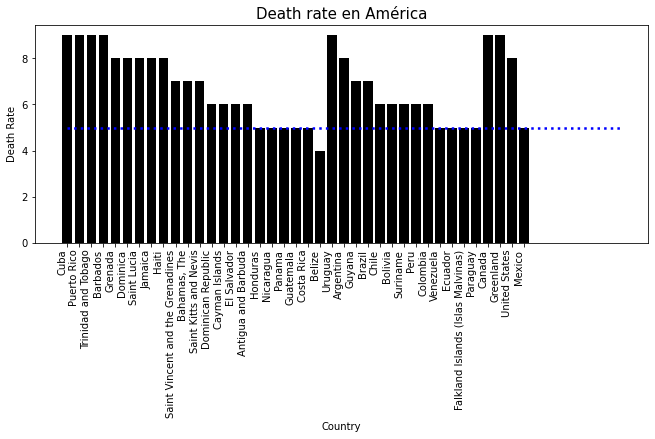

In [112]:
%matplotlib inline

plt.figure(figsize=[11,4])
plt.bar(America['Country'], America['Death rate (deaths/1,000 population)'], width=0.8, color='black', label='DeathRate')
plt.xlabel('Country')
plt.ylabel('Death Rate')
plt.plot([0,46], [Mode_America,Mode_America], linestyle='dotted', linewidth=2.5, color = 'blue', label="Moda")
plt.title("Death rate en América", fontsize=15)
plt.setp(plt.gca().get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

In [87]:
#Asia_DR.plot.bar(x='Country', y='Death rate (deaths/1,000 population)', xlabel="Country", ylabel="Death Rate", color='r', figsize=(14, 6), title='Tasa de muerte/1,000 hab. en Asia'  );
#America.plot.bar(x='Country', y='Death rate (deaths/1,000 population)', xlabel="Country", ylabel="Death Rate", color='r', figsize=(14, 6), title='Tasa de muerte/1,000 hab. en Asia'  );
As_Mean = Asia_DR.mean()
Eur_Mean = Europe_DR.mean()
Am_Mean = America.mean()


### ¿Cuál es la moda de obesidad de países en Asia/Europa/America? (separado por continentes)

In [88]:
#importamos la tabla correspondiente a el índice de obesidad en Asia
html = requests.get('https://www.indexmundi.com/map/?t=0&v=2228&r=as&l=en').content
Asia_Ob = pd.read_html('https://www.indexmundi.com/map/?t=0&v=2228&r=as&l=en')
Asia_Ob = Asia_Ob[1]
Asia_Ob.to_csv('Asia_Ob.csv')
Asia_Ob    

,Country,Obesity - adult prevalence rate (%),Year
0,Kuwait,38,2016
1,Jordan,36,2016
2,Saudi Arabia,35,2016
3,Qatar,35,2016
4,Turkey,32,2016
5,Lebanon,32,2016
6,United Arab Emirates,32,2016
7,Iraq,30,2016
8,Bahrain,30,2016
9,Syria,28,2016


In [89]:
Asia_Ob.columns

Index(['Country', 'Obesity - adult prevalence rate (%)', 'Year'], dtype='object')

In [90]:
Mode_As_Ob = Asia_Ob['Obesity - adult prevalence rate (%)'].mode()
print('La moda de índice de obesidad en países Asiáticos es: ', Mode_As_Ob)

La moda de índice de obesidad en países Asiáticos es:  0    4
1    6
dtype: int64


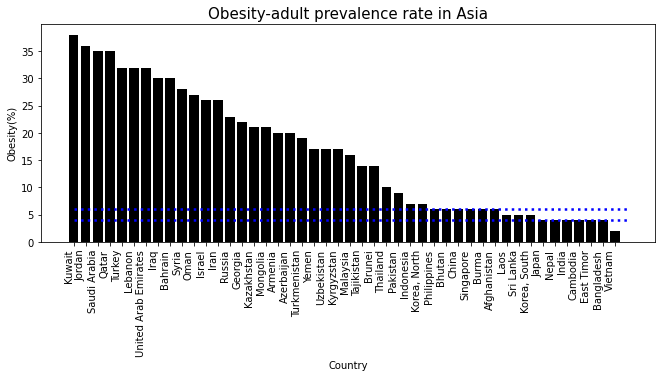

In [91]:
#Vamos a hacer una grafica tipo density, y resaltamos,  con una linea la moda
#Plot_Mode_As = Asia_Ob.plot(x='Country', y='Obesity - adult prevalence rate (%)', kind='density', legend=True, color='red')
#Plot_Mode_As.set_xlabel('Country')
#Plot_Mode_As.set_ylabel('Obesity (%)')
#Plot_Mode_As.set_title('Obesity-adult prevalence rate in Asia', fontsize=15)
%matplotlib inline

plt.figure(figsize=[11,4])
plt.bar(Asia_Ob['Country'], Asia_Ob['Obesity - adult prevalence rate (%)'], width=0.8, color='black', label='obesity')
plt.xlabel('Country')
plt.ylabel('Obesity(%)')
plt.plot([0,46], [Mode_As_Ob,Mode_As_Ob], linestyle='dotted', linewidth=2.5, color = 'blue', label="Moda")
plt.title("Obesity-adult prevalence rate in Asia", fontsize=15)
plt.setp(plt.gca().get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

In [92]:
#importamos la tabla correspondiente a el índice de obesidad en Europa
html = requests.get('https://www.indexmundi.com/map/?t=0&v=2228&r=eu&l=en').content
Eur_Ob = pd.read_html('https://www.indexmundi.com/map/?t=0&v=2228&r=eu&l=en')
Eur_Ob = Eur_Ob[1]
Eur_Ob.to_csv('Eur_Ob.csv')
Eur_Ob    

,Country,Obesity - adult prevalence rate (%),Year
0,Turkey,32,2016
1,Malta,29,2016
2,United Kingdom,28,2016
3,Hungary,26,2016
4,Lithuania,26,2016
5,Czech Republic,26,2016
6,Andorra,26,2016
7,Ireland,25,2016
8,Bulgaria,25,2016
9,Greece,25,2016


In [93]:
Eur_Ob.columns

Index(['Country', 'Obesity - adult prevalence rate (%)', 'Year'], dtype='object')

In [94]:
Mode_Eur_Ob = Eur_Ob['Obesity - adult prevalence rate (%)'].mode()
print('La moda de índice de obesidad en países Europeos es: ', Mode_Eur_Ob)

La moda de índice de obesidad en países Europeos es:  0    22
dtype: int64


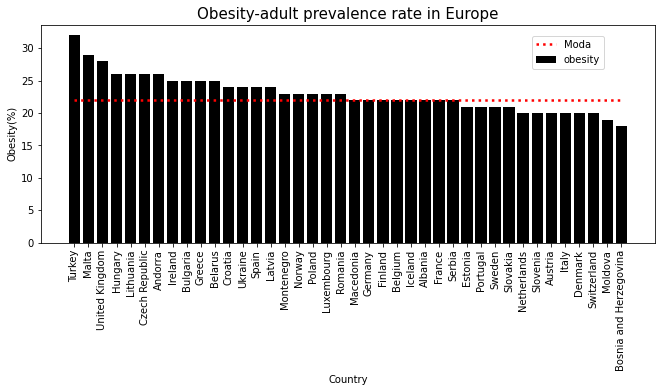

In [95]:

%matplotlib inline

plt.figure(figsize=[11,4])
plt.bar(Eur_Ob['Country'], Eur_Ob['Obesity - adult prevalence rate (%)'], width=0.8, color='black', label='obesity')
plt.xlabel('Country')
plt.ylabel('Obesity(%)')
plt.plot([0,39], [Mode_Eur_Ob, Mode_Eur_Ob], linestyle='dotted', linewidth=2.5, color = 'red', label="Moda")
plt.xticks(fontsize=10, rotation='vertical')
plt.title("Obesity-adult prevalence rate in Europe", fontsize=15)
plt.legend(bbox_to_anchor=(0.8,0.8), loc='lower left', borderaxespad=0.0)
plt.show()


Text(0.5, 1.0, 'Obesity-adult prevalence rate in Europe')

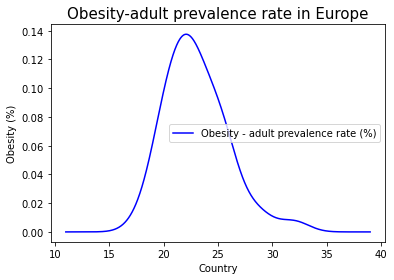

In [96]:
Plot_Mode_Eur = Eur_Ob.plot(x='Country', y='Obesity - adult prevalence rate (%)', kind='density', legend=True, color='blue')
Plot_Mode_Eur.set_xlabel('Country')
Plot_Mode_Eur.set_ylabel('Obesity (%)')
Plot_Mode_Eur.set_title('Obesity-adult prevalence rate in Europe', fontsize=15)

In [97]:
#importamos la tabla correspondiente a el índice de obesidad en Norte America
html = requests.get('https://www.indexmundi.com/map/?t=0&v=2228&r=na&l=en').content
NorAm_Ob = pd.read_html('https://www.indexmundi.com/map/?t=0&v=2228&r=na&l=en')
NorAm_Ob = NorAm_Ob[1]
NorAm_Ob.to_csv('NorAm_Ob.csv')
NorAm_Ob   

,Country,Obesity - adult prevalence rate (%),Year
0,United States,36,2016
1,Canada,29,2016
2,Mexico,29,2016


In [98]:
#importamos la tabla correspondiente a el índice de obesidad en centro America
html = requests.get('https://www.indexmundi.com/map/?t=0&v=2228&r=ca&l=en').content
CenAm_Ob = pd.read_html('https://www.indexmundi.com/map/?t=0&v=2228&r=ca&l=en')
CenAm_Ob = CenAm_Ob[1]
CenAm_Ob.to_csv('CenAm_Ob.csv')
CenAm_Ob 

,Country,Obesity - adult prevalence rate (%),Year
0,"Bahamas, The",32,2016
1,Dominica,28,2016
2,Dominican Republic,28,2016
3,Costa Rica,26,2016
4,Jamaica,25,2016
5,Cuba,25,2016
6,El Salvador,25,2016
7,Belize,24,2016
8,Nicaragua,24,2016
9,Saint Vincent and the Grenadines,24,2016


In [99]:
#importamos la tabla correspondiente a el índice de obesidad en sud America
html = requests.get('https://www.indexmundi.com/map/?t=0&v=2228&r=sa&l=en').content
SudAm_Ob = pd.read_html('https://www.indexmundi.com/map/?t=0&v=2228&r=sa&l=en')
SudAm_Ob = SudAm_Ob[1]
SudAm_Ob.to_csv('SudAm_Ob.csv')
SudAm_Ob 

,Country,Obesity - adult prevalence rate (%),Year
0,Argentina,28,2016
1,Chile,28,2016
2,Uruguay,28,2016
3,Suriname,26,2016
4,Venezuela,26,2016
5,Colombia,22,2016
6,Brazil,22,2016
7,Paraguay,20,2016
8,Guyana,20,2016
9,Bolivia,20,2016


In [100]:
Am_Obesity = pd.concat([NorAm_Ob,CenAm_Ob, SudAm_Ob], ignore_index=True, sort=True)
Am_Obesity

,Country,Obesity - adult prevalence rate (%),Year
0,United States,36,2016
1,Canada,29,2016
2,Mexico,29,2016
3,"Bahamas, The",32,2016
4,Dominica,28,2016
5,Dominican Republic,28,2016
6,Costa Rica,26,2016
7,Jamaica,25,2016
8,Cuba,25,2016
9,El Salvador,25,2016


In [101]:
Mode_Am_Ob = Am_Obesity['Obesity - adult prevalence rate (%)'].mode()
print('La moda de índice de obesidad en América es: ', Mode_Am_Ob)

La moda de índice de obesidad en América es:  0    20
dtype: int64


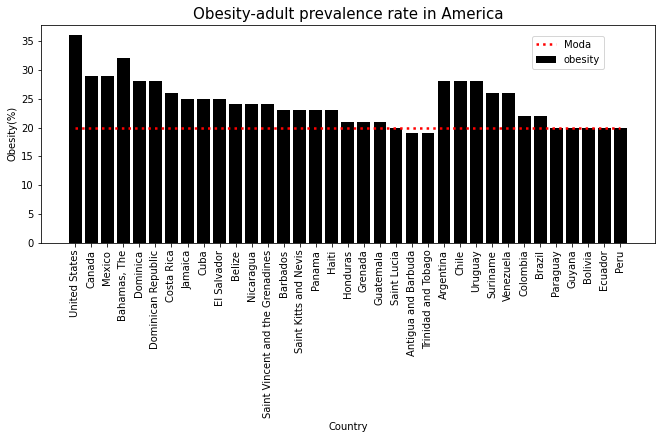

In [102]:

%matplotlib inline

plt.figure(figsize=[11,4])
plt.bar(Am_Obesity['Country'], Am_Obesity['Obesity - adult prevalence rate (%)'], width=0.8, color='black', label='obesity')
plt.xlabel('Country')
plt.ylabel('Obesity(%)')
plt.plot([0,34], [Mode_Am_Ob, Mode_Am_Ob], linestyle='dotted', linewidth=2.5, color = 'red', label="Moda")
plt.xticks(fontsize=10, rotation='vertical')
plt.title("Obesity-adult prevalence rate in America", fontsize=15)
plt.legend(bbox_to_anchor=(0.8,0.8), loc='lower left', borderaxespad=0.0)
plt.show()

Text(0.5, 1.0, 'Obesity-adult prevalence rate in America')

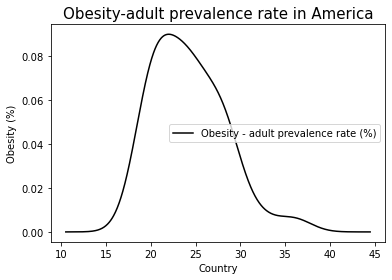

In [103]:
Plot_Mode_Am = Am_Obesity.plot(x='Country', y='Obesity - adult prevalence rate (%)', kind='density', legend=True, color='black')
Plot_Mode_Am.set_xlabel('Country')
Plot_Mode_Am.set_ylabel('Obesity (%)')
Plot_Mode_Am.set_title('Obesity-adult prevalence rate in America', fontsize=15)

In [69]:
datos_DR.columns

Index(['Country', 'Death rate (deaths/1,000 population)', 'Year'], dtype='object')

### ¿Cuál es el promedio de obesidad correspondiente a cada valor de taza de muertes?

In [70]:
#Definición de funciones para la resolución de la pregunta de promedios de obesidad agrupados por taza de muerte

n = datos_DR['Death rate (deaths/1,000 population)'].max()
merged_inner = pd.merge(left=datos_DR, right=datos_Ob, left_on='Country', right_on='Country')
merged_inner2 = pd.merge(left=datos_HB, right=datos_Ob, left_on='Country', right_on='Country')
def Promedio_DR_obesity(merged_inner,datos_Ob,n,a_list):
    Rate = 'Death rate (deaths/1,000 population)'
    for i in range(n):
        A=merged_inner.loc[merged_inner['Death rate (deaths/1,000 population)'] == n-i+1, ['Country', 'Death rate (deaths/1,000 population)']]
        merged_x = pd.merge(left=A, right=datos_Ob, left_on='Country', right_on='Country')
        if np.isnan(merged_x['Obesity - adult prevalence rate (%)'].mean()):
            a_list[i] = 0
        else:
            a_list[i] = merged_x['Obesity - adult prevalence rate (%)'].mean()
        
    return a_list

def Promedio_DR_HBD(merged_inner,datos_HB,n,a_list):
    Rate = 'Death rate (deaths/1,000 population)'
    for i in range(n):
        A=merged_inner.loc[merged_inner['Death rate (deaths/1,000 population)']  == n-i+1, ['Country', 'Death rate (deaths/1,000 population)']]
        merged_x = pd.merge(left=A, right=datos_HB, left_on='Country', right_on='Country')
        if np.isnan(merged_x['Hospital bed density (beds/1,000 population)'].mean()):
            a_list[i] = 0
        else:
            a_list[i] = merged_x['Hospital bed density (beds/1,000 population)'].mean()
        
    return a_list

In [181]:
Elegir = 1
Rate = 'Death rate (deaths/1,000 population)'
a_list = list(range(0, n))
n = datos_DR['Death rate (deaths/1,000 population)'].max()
if Elegir==1:
    
    promedio1 = pd.DataFrame(Promedio_DR_obesity(merged_inner,datos_Ob,n,a_list), list(range(1,n+1)))
    print('A continuación se muestran las tazas de muerte junto con sus promedios de obesidad')
    print(promedio1)

elif Elegir==2:

    promedio2 = pd.DataFrame(Promedio_DR_HBD(merged_inner,datos_HB,n,a_list), list(range(1,n+1)))
    print('A continuación se muestran las tazas de muerte junto con sus promedios de camas/1000 habitantes')
    print(promedio2)

A continuación se muestran las tazas de muerte junto con sus promedios de obesidad
            0
1    0.000000
2   23.000000
3   23.000000
4   17.000000
5   16.600000
6   18.555556
7   16.187500
8   17.095238
9   20.307692
10  16.133333
11  17.413793
12  25.473684
13  23.333333
14  32.000000
15  35.000000


Text(0, 0.5, 'Promedio de obesidad')

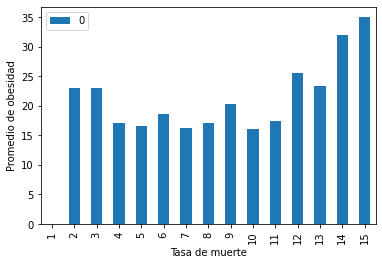

In [205]:
%matplotlib inline
# Creaemos una gráfica de barras
gf1= promedio1.plot(kind='bar') 
gf1.set_xlabel("Tasa de muerte")
gf1.set_ylabel("Promedio de obesidad")

In [202]:
Elegir = 2
Rate = 'Death rate (deaths/1,000 population)'
a_list = list(range(0, n))
n = datos_DR['Death rate (deaths/1,000 population)'].max()
if Elegir==1:
    
    promedio1 = pd.DataFrame(Promedio_DR_obesity(merged_inner,datos_Ob,n,a_list), list(range(1,n+1)))
    print('A continuación se muestran las tazas de muerte junto con sus promedios de obesidad')
    print(promedio1)

elif Elegir==2:

    promedio2 = pd.DataFrame(Promedio_DR_HBD(merged_inner,datos_HB,n,a_list), list(range(1,n+1)))
    print('A continuación se muestran las tazas de muerte junto con sus promedios de camas/1000 habitantes')
    print(promedio2)

A continuación se muestran las tazas de muerte junto con sus promedios de camas/1000 habitantes
           0
1   0.000000
2   6.666667
3   7.500000
4   6.000000
5   5.500000
6   3.750000
7   4.500000
8   3.470588
9   2.909091
10  2.379310
11  3.357143
12  1.722222
13  2.000000
14  2.000000
15  1.333333


Text(0, 0.5, 'Promedio camas por 100mil habitantes')

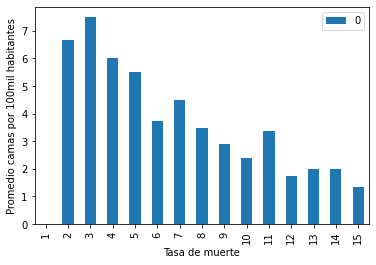

In [206]:
%matplotlib inline
# Creaemos una gráfica de barras
gf2= promedio2.plot(kind='bar') 
gf2.set_xlabel("Tasa de muerte")
gf2.set_ylabel("Promedio camas por 100mil habitantes")